# Data Plotting Workflow

As discussed in the [previous workbook](10_Solvent_IRC_Plots.ipynb), we now have **two data files** with the gas phase and solvent IRC calculation data.

| Files    |  Description    |
|  :---------------------------    | :-------------------------  |
| SN2_IRC_Solvent_Data.txt       | The solvent phase (Water PCM model) IRC calculation
| SN2_IRC_Data_GasPhase_Data.txt       | The gas phase calculation

We can now make some **comparisons**.


## Load Your Tools
Load in the modules needed for this exercise.

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

## Importing Stored Data
No need to use the raw data and process the files.  We have **stored** that work as text files and **documented** the process that we used to clean and process the data. Now we can load them in and use them.

In [2]:
path = "/Users/blink/Documents/CompChem/Exercises/temp/"

solvent_file = path + "SN2_IRC_Solvent_Data.txt"
gas_phase_file = path + "SN2_IRC_Data_GasPhase_Data.txt"

solvent = pd.read_csv(solvent_file, index_col=0)
gasphase = pd.read_csv(gas_phase_file, index_col=0)

print("Solvent IRC Data")
display(solvent.head())
print("\ngas Phase IRC Data")    # the '\n' is a 'new line' character
display(gasphase.head())

FileNotFoundError: [Errno 2] No such file or directory: '/Users/blink/Documents/CompChem/Exercises/temp/SN2_IRC_Solvent_Data.txt'

## Plots
First we must **decide** what to plot. The stride value should be similar for each since it is the same bonds in both cases that are changing (stride is a composite value that encompases the totality of bond changes). How do the energies **compare** in gas phase vs. water as bonds break and form across the transition state? Let us plot the **relative energy** vs. **stride**.

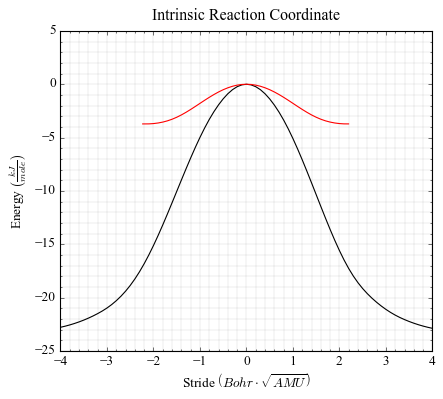

In [3]:
plt.style.use("S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))  


x = solvent[:]["stride"]           # stride value
y = solvent[:]["E(kJ/mole)"]       # relative energy
plt.plot(x,y, "k-")

x = gasphase[:]["stride"]           # stride value
y = gasphase[:]["E(kJ/mole)"]       # relative energy
plt.plot(x,y, "r-")

ax.set(title="Intrinsic Reaction Coordinate",       
          ylabel=r"Energy $\left(\frac{kJ}{mole}\right)$", 
          xlabel=r"Stride $\left(Bohr \cdot \sqrt{AMU}\right)$",                
          xlim=[-4,4.0],                  
          ylim=[-25,5])

#fig.savefig("plot1.pdf")
plt.show()

In the gas phase, the **relative energy** between the ground state and the transition stste is **much smaller**. This is because the **negatively charged** chloride nucleophile/leaving group is very **high in energy** in a **vacuum** where it cannot share its electrons. In the **solvent** model, the energy is less as chloride can be stabilized by the **electric dipole** of water. In fact the gas phase IRC ends early because the **energy** is actually about to start **going back up** as the nucleophile moves away. In a vacumm, chloride separated widely from the methyl chloride is actually **higher in energy** than the transition state.

## Changing Bond Lengths

There are **two** C-Cl distances in each IRC: the **incoming** nucleophile and the departing leaving group. The C-Cl bond in methyl chlorife is calculated to be about 1.95&nbsp;&angst;. The incoming nucleophile starts at a longer distance and **moves** in. The leaving group bond will lengthen. At the transition state, they should be identical (defined by symmetry). Let us plot **one** length against the **other**. Will it be a straight line? Will it be a curve?

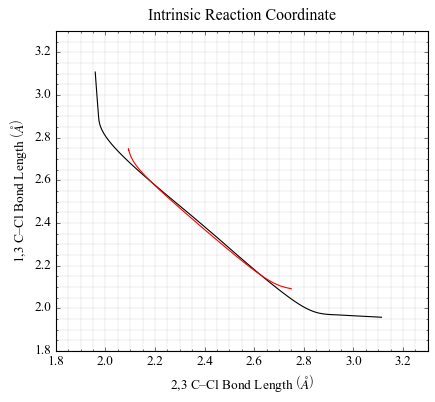

In [4]:
plt.style.use("S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))  


x = solvent[:]["C-Cl1"]           # stride value
y = solvent[:]["C-Cl2"]       # relative energy
plt.plot(x,y, "k-")

x = gasphase[:]["C-Cl1"]           # stride value
y = gasphase[:]["C-Cl2"]       # relative energy
plt.plot(x,y, "r-")

ax.set(title="Intrinsic Reaction Coordinate",       
          ylabel=r"1,3 C–Cl Bond Length $\left(\AA\right)$", 
          xlabel=r"2,3 C–Cl Bond Length $\left(\AA\right)$",                
          xlim=[1.8,3.3],                  
          ylim=[1.8,3.3])

#fig.savefig("plot2.pdf")
plt.show()

The black line is the **solvent** IRC. What would you call that? I vote for "double ended hockey stick". It is clear that, at the beginning, **most** of the stride score is due to the nucleophile **moving in** towards the carbon. When it has moved in from 3.1&nbsp;&angst; to about 2.85&nbsp;&angst; we finally see the leaving group **start to move** in concert. Would you say that the reaction "begins" when the nucleophile **reaches** 2.85&nbsp;&angst;? Does it end when the leaving group reaches that distance on the **other side**? Or should be include the translation of the nucleophile in from 3.1&nbsp;&angst; (or even farther)?

The **gas phase** IRC is shorter because of the high cost of moving the chloride away in a vacuum. The key takeaway here is that solvent modeling has a **very large effect** in charged systems and probably a significant effect in every system.

Should we **redo everything** that we did up until now by adding a $PCM group to all our input files and running them again? That will be left as an exercise for the reader.

## Exploring the 3rd Dimension
Below is a 3D plot. I am just trying this out. I found some [instructions](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) in another useful online book. I also found information [here](http://omz-software.com/pythonista/matplotlib/mpl_toolkits/mplot3d/index.html#:~:text=The%20mplot3d%20toolkit%20adds%20simple,and%20zoom%20the%203D%20scene.), [here](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) and [here](https://pythonprogramming.net/3d-graphs-matplotlib-tutorial/)

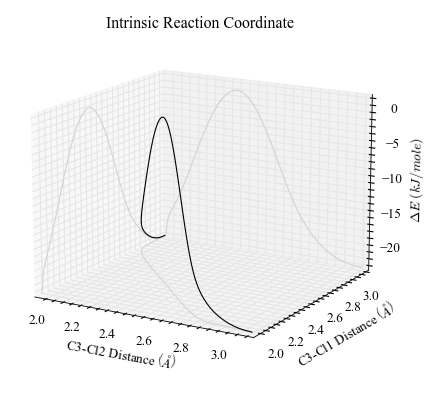

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(15, -60)
# Data for a three-dimensional line
zline = solvent[:]["E(kJ/mole)"]
xline = solvent[:]["C-Cl1"]
yline = solvent[:]["C-Cl2"]

ax.plot(xline, yline, zs=-23.17, zdir='z', color="lightgray")
ax.plot(xline, zline, zs=1.96, zdir='x', color="lightgray")
ax.plot(yline, zline, zs=3.11, zdir='y', color="lightgray")

ax.plot3D(xline, yline, zline, 'k')


# Data for three-dimensional scattered points
#ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens');

ax.set_xlabel(r"C3-Cl2 Distance $\left( \AA \right)$")
ax.set_ylabel(r"C3-Cl1 Distance $\left( \AA \right)$")
ax.set_zlabel(r"$\Delta E \  \left(kJ/mole\right)$")
ax.set_title("Intrinsic Reaction Coordinate")
ax.set_xlim(1.96,3.11)
ax.set_ylim(1.96,3.11)
ax.set_zlim(-23.17,1)

fig.savefig("plot3.pdf")
plt.show()